# 1. Candidate generation

In [ ]:
import pandas as pd 
import numpy as np
import random


***Read Files***

In [ ]:
df = pd.read_csv('D:/19CTT2/data/user_videos_updated.csv')
# todo: config lại để chỉ drop na tại những cột mình xài
df = df.dropna()
df.count()


In [1]:
# map user id with index
userMap = {v:k for k,v in enumerate(df['user_id'].unique())}
df['user_id'] = df['user_id'].map(userMap)
# map video id with index
videoMap = {v:k for k,v in enumerate(df['video_id'].unique())}
df['video_id'] = df['video_id'].map(videoMap)

NameError: name 'df' is not defined

In [ ]:
# calculate example age
df['example_age']=(pd.to_datetime("now")-pd.to_datetime(df['publishedAt']).dt.tz_localize(None))/ np.timedelta64(1,'D')

In [ ]:
def normalize_col(df,col_name):
    df[col_name] = (df[col_name] - df[col_name].mean()) / (df[col_name].std() + 1e-10)
    return df

In [2]:
df['like/dislike'] = [True if x >= 150 else False for _,x in enumerate(df['dwell_time'].tolist())]
df = normalize_col(df,'example_age')
df = normalize_col(df,'dwell_time')

NameError: name 'df' is not defined

In [399]:
df['like/dislike'].value_counts()

False    741
True     735
Name: like/dislike, dtype: int64

In [400]:
users = df.iloc[:,:3]
videos = df.iloc[:,7:]

In [401]:
videos['year'] = videos['publishedAt'].apply(lambda x:str(x).split('-')[0])


In [402]:
watch_cols = ['user_id', 'video_id','dwell_time','like/dislike','watchedAt']
watch = df[watch_cols]
watch['year'] = watch['watchedAt'].apply(lambda x:str(x).split('-')[0])
watch = normalize_col(watch,'dwell_time')

c:\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [403]:
# like & dislike both false -> like
# like & dislike both true -> random false
watch['like/dislike'] = df['like/dislike']
watch['like/dislike'].unique()

array([False,  True])

In [404]:
# genres encoding
genres = df['category_term'].unique().tolist()
genres_encoded = {x: i for i,x in enumerate(genres)}
genres_encoded_2_genres = {i:x for i,x in enumerate(genres)}


# user encoding
user_ids = users['user_id'].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}

# movie index encoding
video_ids = videos["video_id"].unique().tolist()
video2video_encoded = {x: i for i, x in enumerate(video_ids)}
video_encoded2video = {i: x for i, x in enumerate(video_ids)}

# movie title encoding
title_ids = videos['video_title'].unique().tolist()
user_video_fond = like_dislike.pivot(index='user', columns='like/dislike', values='video').reset_index()
user_video_fond.loc[user_video_fond['like'].isnull(),['like']] = user_video_fond.loc[user_video_fond['like'].isnull(),'like'].apply(lambda x: [dfenc['video'].max()+1] ) = {x: i for i, x in enumerate(title_ids)}
title_encoded2title = {i: x for i, x in enumerate(title_ids)}

#video category encoding 
cats = videos['category_term'].unique().tolist()
cat2cat_encoded = {x: i for i,x in enumerate(cats)}
cat_encoded2cat = {x:i for x,i in enumerate(cats)}

# genders encoding
gender_ids = users['user_gender'].unique().tolist()
gender2gender_encoded = {x: i for i, x in enumerate(gender_ids)}
gender_encoded2gender = {i: x for i, x in enumerate(gender_ids)}

#like/disklike encoding
like_dislike_ids =  watch['like/dislike'].unique().tolist()
like_dislike_ids2encoded = {x: i for i, x in enumerate(like_dislike_ids)}
encoded2like = {i: x for i, x in enumerate(like_dislike_ids)}




In [405]:
# # Only do this one time
likeMap = {True:'like', False:'dislike'}
df['like/dislike'] = df['like/dislike'].map(likeMap)

In [406]:

dfenc = df
# Change to encoding
dfenc["title_id"] = df["video_title"].map(title2title_encoded)

dfenc["user"] = df["user_id"].map(user2user_encoded)
dfenc["video"] = df["video_id"].map(video2video_encoded)
dfenc["title_d"] = df["video_title"].map(title2title_encoded)
dfenc['gender_d'] = df['user_gender'].map(gender2gender_encoded)
dfenc['cat_d'] = df['category_term'].map(cat2cat_encoded)

watch_hist = dfenc.groupby(['user'])['video_id'].apply(list).reset_index()

watch_hist_time = dfenc.groupby(['user'])['dwell_time'].apply(list).reset_index()

like_dislike = dfenc.groupby(['user','like/dislike'])['video'].apply(list).reset_index()

example_age = dfenc.groupby(['user'])['example_age'].apply(list).reset_index()


user_video_fond = like_dislike.pivot(index='user', columns='like/dislike', values='video').reset_index()
user_video_fond.fillna(dfenc["video"].max()+1, inplace=True)
user_video_fond['dislike'] = user_video_fond['dislike'].apply(lambda x: (x)) 
user_video_fond['like'] = user_video_fond['like'].apply(lambda x: (x)) 
# coi lại chỗ này -> 1435 (max) đang nhiều
user_video_list = dfenc.pivot(index='user_id', columns='video_id', values='video').reset_index()
user_video_fond = like_dislike.pivot(index='user', columns='like/dislike', values='video').reset_index()
user_video_fond.loc[user_video_fond['like'].isnull(),['like']] = user_video_fond.loc[user_video_fond['like'].isnull(),'like'].apply(lambda x: [dfenc['video'].max()+1] )

sample_data=dfenc[['user','user_gender']]
# sample_data=sample_data.reset_index()
sample_data = sample_data.drop_duplicates()

user_movie_list = pd.merge(sample_data,watch_hist, how= 'left')
user_movie_list = pd.merge(user_movie_list,watch_hist_time, how='left')
user_movie_list = pd.merge(user_movie_list,example_age, how='left')
user_movie_list = pd.merge(user_movie_list,user_video_fond,how='left')

# generate predict labels
user_movie_list['predict_labels'] = user_movie_list['video_id'].apply(lambda x: int(random.uniform(0,dfenc["video"].max()))) #label을 마지막 값으로..


# split 60:40
# train_size = user_movie_list.user.max() * 0.6
# # train_size = 10 * 0.6
# test_size = user_movie_list.user.max() - train_size
# train_data = user_movie_list[(user_movie_list.user >= 1)&
#                                   (user_movie_list.user <= tr)]
# test_data = user_movie_list[(user_movie_list.user >= train_size+1)&
#                                   (user_movie_list.user <= 10)]

In [407]:
# user_movie_list['predict_labels'] = user_movie_list['like'].apply(lambda x: (x[-1]) )
# user_movie_list['like'] = user_movie_list['like'].apply(lambda x: x[:-1])

In [408]:
# split test and train set
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(user_movie_list, test_size=0.2)


In [409]:
user_movie_list

,user,user_gender,video_id,dwell_time,example_age,dislike,like,predict_labels
0,0,Female,"[0, 1]","[-0.3868318074683337, 1.652215234179126]","[-0.5473293143225246, 0.30601517822125823]",[0],[1],876
1,1,Male,"[2, 3, 4]","[0.11961398945335214, -0.6393313335087709, -0....","[-0.7498156961033198, -0.8053556046427931, 0.0...",[3],"[2, 4]",1011
2,2,Male,[5],[-0.12214436795803571],[0.80147125184269],NaN,[5],847
3,3,Female,"[6, 7, 8]","[-0.6794602665617813, 0.2514288571028265, 0.22...","[2.2943273329718292, 1.6946288563179357, 1.695...",[6],"[7, 8]",72
4,4,Female,[9],[-0.5346581285240988],[2.0662103271083296],[9],[1435],615
...,...,...,...,...,...,...,...,...
143,143,Female,"[1411, 1412, 1413, 1414, 1415, 1416, 1417]","[0.7568929343111044, -0.6447110359630486, 0.17...","[-6.120972349896059e-05, 1.7882759279639244, -...",[1412],"[1411, 1413, 1414, 1415, 1416, 1417]",577
144,144,Female,[219],[-0.16083871368990538],[-0.780172114535979],NaN,[219],802
145,145,Female,"[1418, 1419, 1420, 1421, 214, 1422, 39, 1423, ...","[-0.009772413641902929, -0.6806669003890967, 0...","[-0.8572521146874057, -0.9136670678625438, 1.7...","[1419, 1421, 214, 1422, 1423, 1425]","[1418, 1420, 39, 1424]",607
146,146,Female,"[1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433]","[0.12305152814023815, -0.4512453860635355, 0.0...","[-0.3761021150250298, -0.3609177122240275, -0....","[1427, 1431]","[1426, 1428, 1429, 1430, 1432, 1433]",623


### Hyperparameter Definition

In [410]:
# CONTINUE FROM HERE - 30-09-2021
EMBEDDING_DIMS = 16
DENSE_UNITS = 64
DROPOUT_PCT = 0.0
ALPHA = 0.0
NUM_CLASSES= df["video_id"].max() + 2
LEARNING_RATE = 0.003

In [411]:

import tensorflow as tf
tf.random.set_seed(
    1024
)
class MaskedEmbeddingsAggregatorLayer(tf.keras.layers.Layer):
    def __init__(self, agg_mode='sum', **kwargs):
        super(MaskedEmbeddingsAggregatorLayer, self).__init__(**kwargs)

        if agg_mode not in ['sum', 'mean']:
            raise NotImplementedError('mode {} not implemented!'.format(agg_mode))
        self.agg_mode = agg_mode
    
    @tf.function
    def call(self, inputs, mask=None):
#         https://www.tensorflow.org/api_docs/python/tf/ragged/boolean_mask
        masked_embeddings = tf.ragged.boolean_mask(inputs, mask)
        if self.agg_mode == 'sum':
            aggregated =  tf.reduce_sum(masked_embeddings, axis=1)
        elif self.agg_mode == 'mean':
            aggregated = tf.reduce_mean(masked_embeddings, axis=1)
        return aggregated
    
    def get_config(self):
        # this is used when loading a saved model that uses a custom layer
        return {'agg_mode': self.agg_mode}
    
class L2NormLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(L2NormLayer, self).__init__(**kwargs)
    
    @tf.function
    def call(self, inputs, mask=None):
        if mask is not None:
            inputs = tf.ragged.boolean_mask(inputs, mask).to_tensor()
        return tf.math.l2_normalize(inputs, axis=-1)

    def compute_mask(self, inputs, mask):
        return mask

In [412]:
#---inputs
import tensorflow as tf
import datetime
import os
input_watch_hist = tf.keras.Input(shape=(None, ), name='watch_hist')
input_dwell_time = tf.keras.layers.Input(shape=(None,), name='dwell_time')
input_like = tf.keras.layers.Input(shape=(None,), name='like')
input_example_age = tf.keras.Input(shape=(None, ), name='example_age')
# input_occupation = tf.keras.Input(shape=(None, ), name='occupation')


#--- layers
features_embedding_layer = tf.keras.layers.Embedding(input_dim=NUM_CLASSES, output_dim=EMBEDDING_DIMS, 
                                            mask_zero=True, trainable=True, name='features_embeddings')
labels_embedding_layer = tf.keras.layers.Embedding(input_dim=NUM_CLASSES, output_dim=EMBEDDING_DIMS, 
                                            mask_zero=True, trainable=True, name='labels_embeddings')

avg_embeddings = MaskedEmbeddingsAggregatorLayer(agg_mode='mean', name='aggregate_embeddings')

dense_1 = tf.keras.layers.Dense(units=DENSE_UNITS, name='dense_1')
dense_2 = tf.keras.layers.Dense(units=DENSE_UNITS, name='dense_2')
dense_3 = tf.keras.layers.Dense(units=DENSE_UNITS, name='dense_3')
l2_norm_1 = L2NormLayer(name='l2_norm_1')

dense_output = tf.keras.layers.Dense(NUM_CLASSES, activation=tf.nn.softmax, name='dense_output')

#--- features
features_embeddings = features_embedding_layer(input_watch_hist)
l2_norm_features = l2_norm_1(features_embeddings)
avg_features = avg_embeddings(l2_norm_features)

labels_watch_embeddings = labels_embedding_layer(input_dwell_time)
l2_norm_watched = l2_norm_1(labels_watch_embeddings)
avg_watched = avg_embeddings(l2_norm_watched)

labels_like_embeddings = labels_embedding_layer(input_like)
l2_norm_like = l2_norm_1(labels_like_embeddings)
avg_liked = avg_embeddings(l2_norm_like)

labels_example_age_embeddings = labels_embedding_layer(input_example_age)
l2_norm_example_age = l2_norm_1(labels_example_age_embeddings)
avg_example_age = avg_embeddings(l2_norm_example_age)

# labels_occupation_embeddings = labels_embedding_layer(input_occupation)
# l2_norm_occupation = l2_norm_1(labels_occupation_embeddings)
# avg__occupation = avg_embeddings(l2_norm_occupation)


print(avg_features)
print(avg_watched)
print(avg_liked)
print(avg_example_age)
# print(input_occupation)

# 임베딩 벡터들 연결
concat_inputs = tf.keras.layers.Concatenate(axis=1)([avg_features,
                                                     avg_watched,
                                                     avg_liked,
                                                     avg_example_age,
#                                                      avg__occupation
                                                     ])
# Dense Layers
dense_1_features = dense_1(concat_inputs)
dense_1_relu = tf.keras.layers.ReLU(name='dense_1_relu')(dense_1_features)
dense_1_batch_norm = tf.keras.layers.BatchNormalization(name='dense_1_batch_norm')(dense_1_relu)

dense_2_features = dense_2(dense_1_relu)
dense_2_relu = tf.keras.layers.ReLU(name='dense_2_relu')(dense_2_features)
# dense_2_batch_norm = tf.keras.layers.BatchNormalization(name='dense_2_batch_norm')(dense_2_relu)

dense_3_features = dense_3(dense_2_relu)
dense_3_relu = tf.keras.layers.ReLU(name='dense_3_relu')(dense_3_features)
dense_3_batch_norm = tf.keras.layers.BatchNormalization(name='dense_3_batch_norm')(dense_3_relu)
# for ranking we use this line
# outputs = dense_output(dense_3_batch_norm) + tf.keras.layers.Softmax(dense_3_batch_norm)
# for canndidate generation
outputs = dense_output(dense_3_batch_norm)


#Optimizer
optimiser = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

#--- prep model
model = tf.keras.models.Model(
    inputs=[input_watch_hist, 
            input_dwell_time, 
            input_like,
            input_example_age,
#             input_occupation,
            ],
    outputs=[outputs]
)
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
et = tf.keras.callbacks.EarlyStopping(
    monitor="acc",
    #min_delta=0,
    patience=50,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

# đổi tử sparse -> categorical:
# đổi predict labels từ scalar (1 int) -> one hot encoding.
# vd [1],[2],[3] -> [100],[010], [001]

# model.compile(optimizer=optimiser, loss = lambda y_pred,y_true: tf.keras.losses.CategoricalCrossentropy()(tf.keras.layers.Softmax(y_pred), y) )
model.compile(optimizer=optimiser, loss='sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='aggregate_embeddings/PartitionedCall:0', description="created by layer 'aggregate_embeddings'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='aggregate_embeddings/PartitionedCall:0', description="created by layer 'aggregate_embeddings'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='aggregate_embeddings/PartitionedCall:0', description="created by layer 'aggregate_embeddings'")
KerasTensor(type_spec=TensorSpec(shape=(None, 16), dtype=tf.float32, name=None), name='aggregate_embeddings/PartitionedCall:0', description="created by layer 'aggregate_embeddings'")
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
watch_hist (InputLayer)         [(None, None)]      

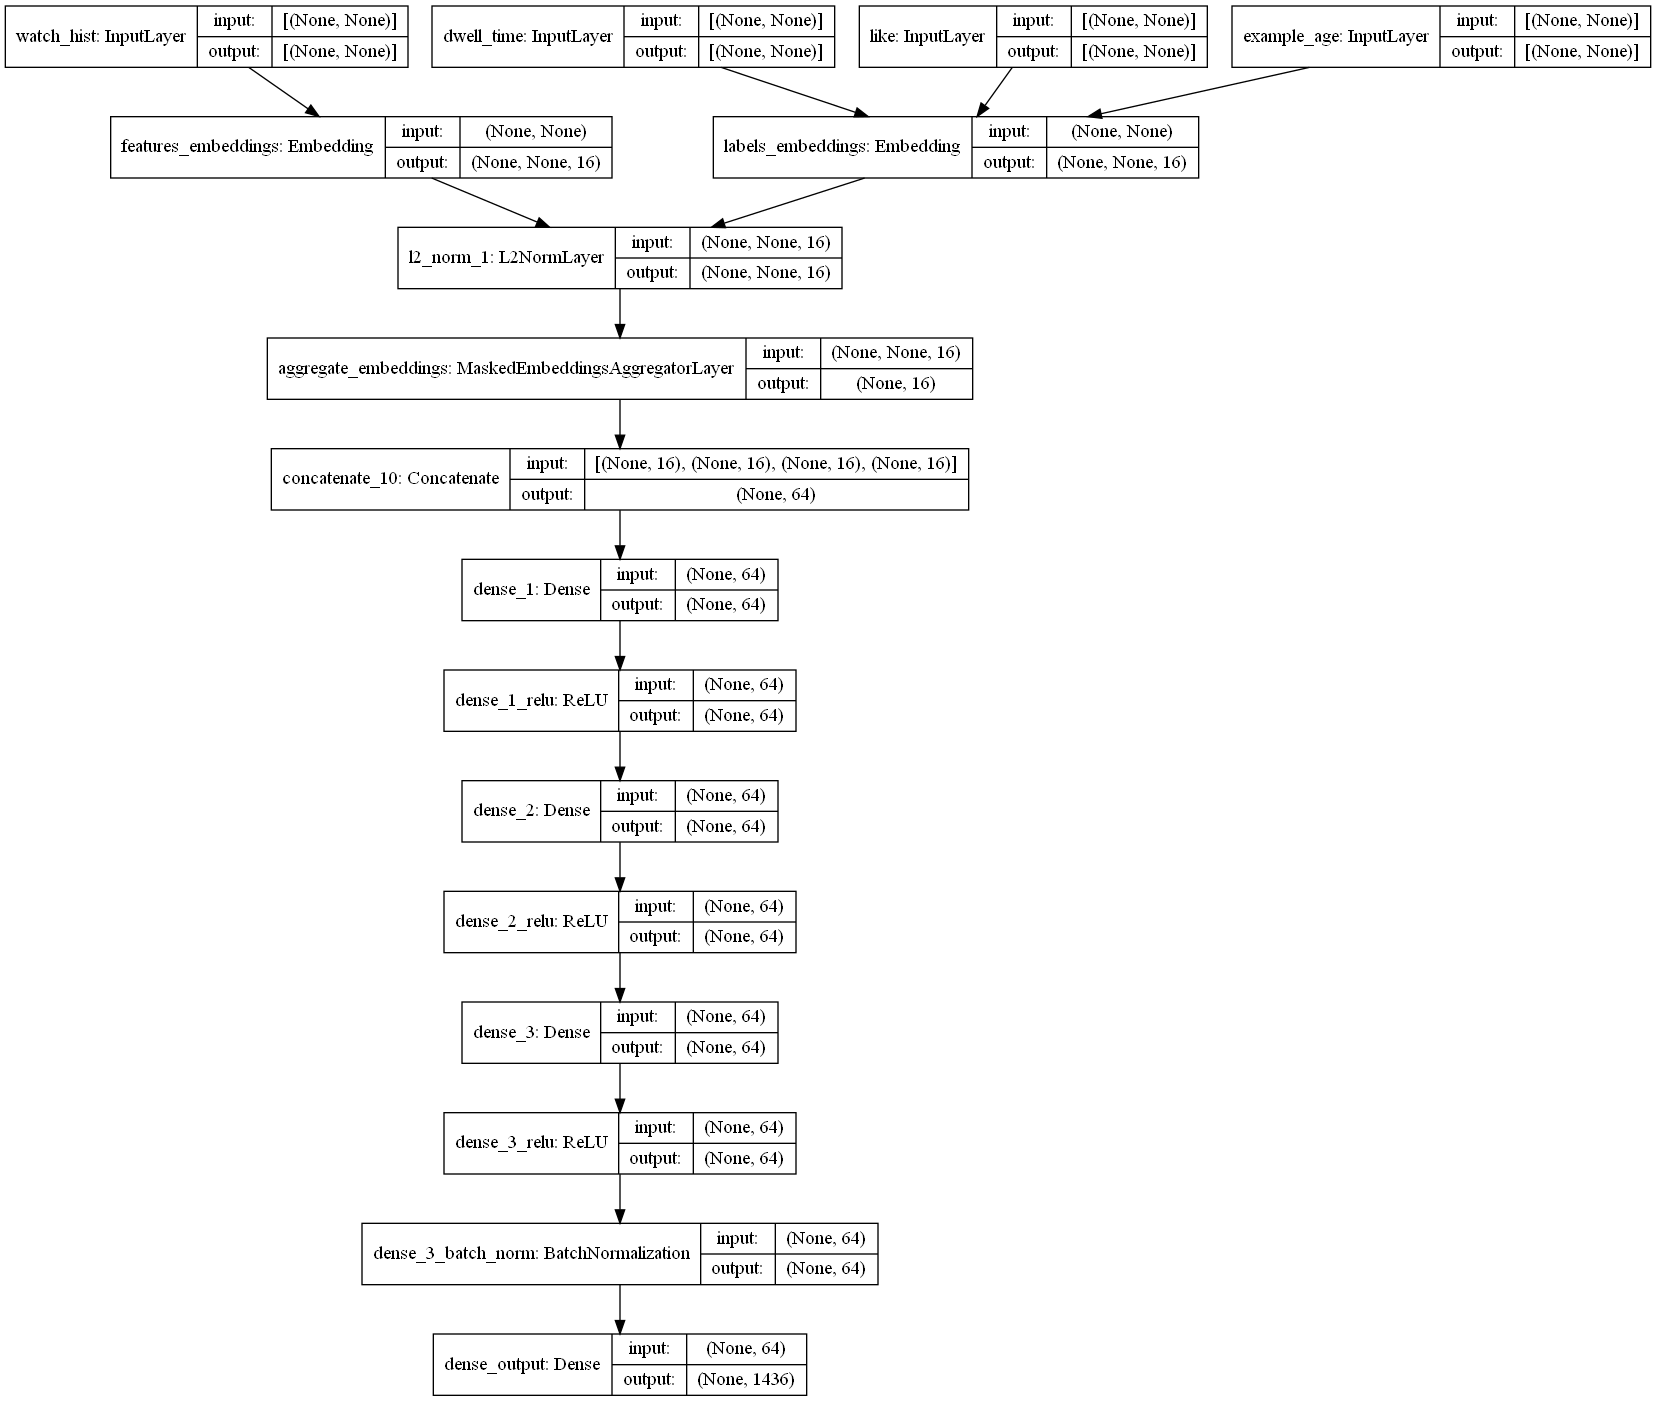

In [413]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,dpi=96)

In [414]:
train_data

,user,user_gender,video_id,dwell_time,example_age,dislike,like,predict_labels
70,70,Male,"[507, 508]","[0.04351703445462293, 0.3073504082080555]","[0.4039471752217724, -0.6776673957565547]",NaN,"[507, 508]",1119
58,58,Male,"[399, 400, 401, 402, 403, 404, 405, 406, 407, ...","[-0.6859432639261736, -0.283559756625708, 0.02...","[-0.7908755034486994, -0.6956595450431851, -0....","[399, 400, 402, 404, 406, 407, 410]","[401, 403, 405, 408, 409]",1245
28,28,Male,"[211, 212, 2, 213, 214]","[-0.3076194880539917, 0.27116659028818196, 13....","[2.0565529400473963, 1.4186129155636418, -0.74...","[211, 214]","[212, 2, 213]",1254
137,137,Female,"[1280, 10]","[0.3418169764744447, 0.48547326828316517]","[-0.3910735084903457, -0.5869904603176676]",NaN,"[1280, 10]",1005
67,67,Male,"[454, 455, 456, 457, 458, 459, 460, 461, 462, ...","[-0.4297630488054367, -0.14827391711025337, -0...","[-0.52942153700923, 0.1701724814758744, -0.000...","[454, 456, 457, 458, 459, 461, 464, 465, 466, ...","[455, 460, 462, 463, 469, 472, 392]",302
...,...,...,...,...,...,...,...,...
30,30,Female,[219],[0.6718632417343401],[-0.780172114535979],NaN,[219],522
101,101,Female,"[810, 811, 812, 813, 814, 815, 816, 817, 818, ...","[0.27096295183369795, -0.4118762979899428, -0....","[0.6009812748043557, -0.537114236906847, -0.81...","[811, 812, 813, 814, 815, 816, 817, 818, 819, ...","[810, 826, 835, 840, 844, 846, 856, 862]",467
39,39,Male,"[280, 281, 282, 283, 284, 285, 286, 287, 288, ...","[-0.08002464105895077, -0.07620414050243829, -...","[0.19858036604241844, 1.2010559894159283, 1.17...","[282, 283, 284, 286, 287, 289]","[280, 281, 285, 288, 290]",530
142,142,Female,"[1390, 1391, 1392, 1393, 1394, 1395, 1396, 139...","[-0.08698178169049968, -0.07330153268106251, 0...","[1.722703911566351, 0.7423296934958186, 0.5177...","[1393, 1395, 1396, 1397, 1401, 1404, 1405, 140...","[1390, 1391, 1392, 1394, 1398, 1399, 1400, 140...",1174


In [415]:
history = model.fit([tf.keras.preprocessing.sequence.pad_sequences(train_data['video_id']),
           tf.keras.preprocessing.sequence.pad_sequences(train_data['dwell_time'], dtype=float),
           tf.keras.preprocessing.sequence.pad_sequences(train_data['like']) + 1e-10,
           tf.keras.preprocessing.sequence.pad_sequences(train_data['example_age'], dtype=float),
#            tf.keras.preprocessing.sequence.pad_sequences(train_data['occupation'], dtype=float),
           ],train_data['predict_labels'].values,
           steps_per_epoch=1, epochs=5000,callbacks=[et])




Epoch 1/5000
1/1 [==============================] - 1s 1s/step - loss: 7.2855 - acc: 0.0000e+00
Epoch 2/5000
1/1 [==============================] - 0s 9ms/step - loss: 7.2140 - acc: 0.0000e+00
Epoch 3/5000
1/1 [==============================] - 0s 8ms/step - loss: 7.1501 - acc: 0.0254
Epoch 4/5000
1/1 [==============================] - 0s 7ms/step - loss: 7.0761 - acc: 0.0763
Epoch 5/5000
1/1 [==============================] - 0s 9ms/step - loss: 6.9952 - acc: 0.1017
Epoch 6/5000
1/1 [==============================] - 0s 8ms/step - loss: 6.9057 - acc: 0.1441
Epoch 7/5000
1/1 [==============================] - 0s 8ms/step - loss: 6.8070 - acc: 0.1780
Epoch 8/5000
1/1 [==============================] - 0s 8ms/step - loss: 6.7011 - acc: 0.1780
Epoch 9/5000
1/1 [==============================] - 0s 8ms/step - loss: 6.5900 - acc: 0.1949
Epoch 10/5000
1/1 [==============================] - 0s 8ms/step - loss: 6.4749 - acc: 0.2034
Epoch 11/5000
1/1 [==============================] - 0s 8ms/st

In [423]:
model.save("candidate_generation.h5")

c:\python39\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [424]:
pred = model.predict([tf.keras.preprocessing.sequence.pad_sequences(test_data['video_id']),
           tf.keras.preprocessing.sequence.pad_sequences(test_data['dwell_time'], dtype=float),
           tf.keras.preprocessing.sequence.pad_sequences(test_data['like']),
           tf.keras.preprocessing.sequence.pad_sequences(test_data['example_age'], dtype=float)
           ])

In [427]:
pred

array([[0.00021504, 0.00020727, 0.00019551, ..., 0.00020597, 0.00020724,
        0.00019566],
       [0.00021504, 0.00020727, 0.00019551, ..., 0.00020597, 0.00020724,
        0.00019566],
       [0.00021504, 0.00020727, 0.00019551, ..., 0.00020597, 0.00020724,
        0.00019566],
       ...,
       [0.00021504, 0.00020727, 0.00019551, ..., 0.00020597, 0.00020724,
        0.00019566],
       [0.00021504, 0.00020727, 0.00019551, ..., 0.00020597, 0.00020724,
        0.00019566],
       [0.00021504, 0.00020727, 0.00019551, ..., 0.00020597, 0.00020724,
        0.00019566]], dtype=float32)

In [428]:
# candidate generation: 
###### We extract the top-7 recommendation data for each user.
N = 6
k = np.sort((-pred).argsort()[:,:N])
print(k)
k = k.flatten()
k[k>df["video"].max()]=0
k = np.unique(k)


[[  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [ 623  757  881  975 1017 1018]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [ 383  815  975 1018 1088 1307]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]
 [  69  302  436  530  538  623]]


In [429]:
k

array([  69,  302,  383,  436,  530,  538,  623,  757,  815,  881,  975,
       1017, 1018, 1088, 1307], dtype=int64)

In [433]:
title_encoded2title[302]

'Game Of Thrones Season 2 All Deleted Scenes'

# 2. Ranking

### Load dmodel and preprocess data

In [421]:
model = tf.keras.models.load_model(
    'candidate_generation.h5',
    custom_objects={
        'L2NormLayer': L2NormLayer,
        "MaskedEmbeddingsAggregatorLayer": MaskedEmbeddingsAggregatorLayer
    }
)

# custom_object: not available in tensorflow 

In [422]:
train_data

,user,user_gender,video_id,dwell_time,example_age,dislike,like,predict_labels
70,70,Male,"[507, 508]","[0.04351703445462293, 0.3073504082080555]","[0.4039471752217724, -0.6776673957565547]",NaN,"[507, 508]",1119
58,58,Male,"[399, 400, 401, 402, 403, 404, 405, 406, 407, ...","[-0.6859432639261736, -0.283559756625708, 0.02...","[-0.7908755034486994, -0.6956595450431851, -0....","[399, 400, 402, 404, 406, 407, 410]","[401, 403, 405, 408, 409]",1245
28,28,Male,"[211, 212, 2, 213, 214]","[-0.3076194880539917, 0.27116659028818196, 13....","[2.0565529400473963, 1.4186129155636418, -0.74...","[211, 214]","[212, 2, 213]",1254
137,137,Female,"[1280, 10]","[0.3418169764744447, 0.48547326828316517]","[-0.3910735084903457, -0.5869904603176676]",NaN,"[1280, 10]",1005
67,67,Male,"[454, 455, 456, 457, 458, 459, 460, 461, 462, ...","[-0.4297630488054367, -0.14827391711025337, -0...","[-0.52942153700923, 0.1701724814758744, -0.000...","[454, 456, 457, 458, 459, 461, 464, 465, 466, ...","[455, 460, 462, 463, 469, 472, 392]",302
...,...,...,...,...,...,...,...,...
30,30,Female,[219],[0.6718632417343401],[-0.780172114535979],NaN,[219],522
101,101,Female,"[810, 811, 812, 813, 814, 815, 816, 817, 818, ...","[0.27096295183369795, -0.4118762979899428, -0....","[0.6009812748043557, -0.537114236906847, -0.81...","[811, 812, 813, 814, 815, 816, 817, 818, 819, ...","[810, 826, 835, 840, 844, 846, 856, 862]",467
39,39,Male,"[280, 281, 282, 283, 284, 285, 286, 287, 288, ...","[-0.08002464105895077, -0.07620414050243829, -...","[0.19858036604241844, 1.2010559894159283, 1.17...","[282, 283, 284, 286, 287, 289]","[280, 281, 285, 288, 290]",530
142,142,Female,"[1390, 1391, 1392, 1393, 1394, 1395, 1396, 139...","[-0.08698178169049968, -0.07330153268106251, 0...","[1.722703911566351, 0.7423296934958186, 0.5177...","[1393, 1395, 1396, 1397, 1401, 1404, 1405, 140...","[1390, 1391, 1392, 1394, 1398, 1399, 1400, 140...",1174
